# DORIS DATA

## Introduction to DORIS RINEX Format

DORIS data are disseminated in RINEX (Receiver Independent Exchange) format, adopted from the GNSS community. Detailed information can be found in the relevant [IDS webpage](https://ids-doris.org/user-corner/about-doris-rinex-format.html). Each RINEX file contains measurements performed by a (on-borad) receiver for a given time interval (typically one day) to beacons/antennae located on the Earth's surface.

A DORIS RINEX file contains two major parts:
- A header, where important information are recorded covering the whole measurement period, and
- a data part; the latter is divided into observation **blocks**, i.e. measurements performs on a specific epoch, at various beacons.

Example of a DORIS RINEX header:
```text
     3.00           O                   D                   RINEX VERSION / TYPE
Expert              CNES                20240102 063031 UTC PGM / RUN BY / DATE 
G = GPS R = GLONASS E = GALILEO S = GEO M = MIXED D = DORIS COMMENT             
SENTINEL-6A                                                 SATELLITE NAME      
2020-086A                                                   COSPAR NUMBER       
SPA_BN1_5.8.0       CNES                                    OBSERVER / AGENCY   
CHAIN1              DGXX-S              1.00                REC # / TYPE / VERS 
DORIS               STAREC                                  ANT # / TYPE        
        1.6250        0.4000        0.9970                  APPROX POSITION XYZ 
        1.5274       -0.0070        0.0370                  CENTER OF MASS: XYZ 
D   10  L1  L2  C1  C2  W1  W2   F   P   T   H              SYS / # / OBS TYPES 
  2024    01    01    00    00   28.8705004     DOR         TIME OF FIRST OBS   
D  100   2  C1  C2                                          SYS / SCALE FACTOR  
D           0.000                                           L2 / L1 DATE OFFSET 
    50                                                      # OF STATIONS       
D01  COBB COLD BAY                      49804S004  3   0    STATION REFERENCE   
D02  YEMB YELLOWKNIFE                   40127S009  4   0    STATION REFERENCE   
D03  THUB THULE                         43001S005  3   0    STATION REFERENCE  
D48           4.453          35.503                         TIME REF STATION    
  2024    01    01    00    00    0.0000000                 TIME REF STAT DATE  
                                                            END OF HEADER   
```

Example of a data block:
```text
> 2024 01 01 00 00 27.129948870  0  3        1.740551554 0 
D01  -3425417.873    -2327925.282   -44561256.18511 -44561151.34911      -121.150 7
         -109.600 7      -463.714         991.000 0        -2.500 1        84.000 1
D02  -3413218.021    -2325523.752   -51962978.77812 -51963008.66212      -120.450 7
         -110.300 7      -463.714        1004.000 0        -6.000 0        94.000 0
D03  -2320422.354     -457244.926   -34561326.14313 -34561603.43413      -127.100 7
         -116.600 7      -463.714        1002.000 1       -20.000 1        82.000 1
> 2024 01 01 00 00 30.129948870  0  3        1.740551554 0 
D01  -3373507.494    -2317696.678   -44560491.90611 -44560387.03311      -121.150 7
         -109.600 7      -463.714         991.000 0        -2.500 1        84.000 1
D02  -3496936.484    -2342020.217   -51964211.33912 -51964241.26412      -120.450 7
         -110.300 7      -463.714        1004.000 0        -6.000 0        94.000 0
D03  -2334011.598     -459922.652   -34561526.20613 -34561803.50413      -127.100 7
         -116.600 7      -463.714        1002.000 1       -20.000 1        82.000 1
```

From the first observation of the first block, we can see that the receiver performed a measurement to beacon D01 (aka COBB) at 2024/01/01 00:00:27.129948870 and got the values L1=-3425417.873 in [L1 cycles], L2=-2327925.282 in [L2 cycles], C1=-44561256.185 [km], C2=-44561151.349 [km], W1=-121.150 [dBm],  W2=-109.600 [dBm], F=-463.714$\times 10^{-11}$, P=991.0 [100Pa], T=-2.5 [$^\circ$C] and H=84.0 [%]. The onboard receiver clock offset was 1.740551554 [sec].

The block contains two more observation records, made to D02 and D03 aka YEMB and THUB respectively. Then another block follows, $\approx$3 seconds later.  

## Parsing DORIS RINEX files

### Creating Instances and the RINEX Header

To be able to handle DORIS RINEX files, we need to include `DorisRinex` class from the `rinex.doris.rinex` module (within the `dsoclasses` main library). The following should suffice: 

```python
from dsoclasses.rinex.doris.rinex import DorisRinex
```

To create an *instance* of the class given a RINEX filename (including path), we can write:

```python
rnx = DorisRinex("my/path/to/data/DORIS_RINEX_filename")
```

At initialization/construction time, the RINEX header will be parsed and we'll have access to header information. Here is an example:

In [4]:
from dsoclasses.rinex.doris.rinex import DorisRinex
from os.path import join

# set the filename ...
data_path = "../../data"
drinex = join(data_path, "s6arx24001.001")

# construct the instance ...
rnx = DorisRinex(drinex)

# now we have acess to its header via the rnx instance
# here is a list of all the information we have (from the header)
print(sorted(vars(rnx)))

# lets' get the satellite's name and COSPAR
print(f'Satellite: {rnx.sat_name} COSPAR {rnx.sat_cospar}')

# let's print all beacons observed (stored in rnx.beacons)
for beacon in rnx.beacons:
    print(f"Domes {beacon['domes']} Id {beacon['id']} Name {beacon['name']:20s} Type {beacon['type']} Num {beacon['num']}")

['agency', 'antenna_number', 'antenna_type', 'beacons', 'filename', 'l2l1_date_offset', 'num_ref_stations', 'num_stations', 'obscodes', 'observer', 'receiver_number', 'receiver_type', 'receiver_version', 'sat_cospar', 'sat_name', 'system', 'time_first_obs', 'time_ref_beacons', 'time_sys', 'type', 'version', 'xapprox', 'yapprox', 'zapprox']
Satellite: SENTINEL-6A COSPAR 2020-086A
Domes 49804S004 Id COBB Name COLD BAY             Type 3 Num D01
Domes 40127S009 Id YEMB Name YELLOWKNIFE          Type 4 Num D02
Domes 43001S005 Id THUB Name THULE                Type 3 Num D03
Domes 40405S043 Id GONC Name GOLDSTONE            Type 4 Num D04
Domes 40451S178 Id GRFB Name GREENBELT            Type 3 Num D05
Domes 40503S006 Id SOFC Name SOCORRO              Type 3 Num D06
Domes 49914S003 Id MIAB Name MIAMI                Type 4 Num D07
Domes 41201S002 Id MNAC Name MANAGUA              Type 3 Num D08
Domes 42005S003 Id SCSC Name SANTA CRUZ           Type 4 Num D09
Domes 97205S001 Id LAOB Name LE L

### Looping Through Observation Blocks

We can seamlesy iterate through a `DorisRinex` instance, using python-like iterators:

```python
# for each data block in the instance ....
for block in rnx:
    # for each beacon-specific observation set in the block ...
    for beacon in block:
```

`block` here is a `DorisRinex.DataBlock` instance, containing information for the whole block (e.g. observation epoch, clock offset, etc) as well as a list of dictionaries holding observation values per beacon for all recorded measurements within the block. Here is a breakdown:

**NOTE** *Block epochs are stored as `attotime` instances instead of native python `datetime` instances to increase precision. We can use the `at2pt` function from the `dsoclasses.time.pyattotime` to convert an attotime to a native datetime instance.*

In [5]:
from dsoclasses.time.pyattotime import at2pt

for block in rnx:
    print(f'Block -> epoch: {at2pt(block.t())}, flag: {block.flag()},  # beacons: {block.nbeacons()}, clock offset: {block.clock_offset()}')
    break

Block -> epoch: 2024-01-01 00:00:27.129948, flag: 0,  # beacons: 3, clock offset: 1.740551554


Let's loop through each becon observation set, for each observation block. Each block can have a number of observed beacons, with each observed beacon resulting in a set of measurements (L1, L2, C1, C2, etc).

In [6]:
# for each data block in the instance ....
for block in rnx:
    # for each beacon-specific observation set in the block ...
    for beacon in block:
        print(beacon)
        break
    break

('D01', {'L1': {'value': -3425417.873, 'm1': None, 'm2': None}, 'L2': {'value': -2327925.282, 'm1': None, 'm2': None}, 'C1': {'value': -44561256.185, 'm1': 1, 'm2': 1}, 'C2': {'value': -44561151.349, 'm1': 1, 'm2': 1}, 'W1': {'value': -121.15, 'm1': None, 'm2': 7}, 'W2': {'value': -109.6, 'm1': None, 'm2': 7}, 'F': {'value': -463.714, 'm1': None, 'm2': None}, 'P': {'value': 991.0, 'm1': None, 'm2': 0}, 'T': {'value': -2.5, 'm1': None, 'm2': 1}, 'H': {'value': 84.0, 'm1': None, 'm2': 1}})


Better yet, split the beacon and the observation set:

In [7]:
# for each data block in the instance ....
for block in rnx:
    # for each beacon-specific observation set in the block ...
    for beacon, data in block:
        print(f'beacon id      : {beacon}')
        print(f'observation set: {data}')
        break
    break

beacon id      : D01
observation set: {'L1': {'value': -3425417.873, 'm1': None, 'm2': None}, 'L2': {'value': -2327925.282, 'm1': None, 'm2': None}, 'C1': {'value': -44561256.185, 'm1': 1, 'm2': 1}, 'C2': {'value': -44561151.349, 'm1': 1, 'm2': 1}, 'W1': {'value': -121.15, 'm1': None, 'm2': 7}, 'W2': {'value': -109.6, 'm1': None, 'm2': 7}, 'F': {'value': -463.714, 'm1': None, 'm2': None}, 'P': {'value': 991.0, 'm1': None, 'm2': 0}, 'T': {'value': -2.5, 'm1': None, 'm2': 1}, 'H': {'value': 84.0, 'm1': None, 'm2': 1}}


To extract measurements it is important to understand that each `data` holds a dictionary with keys the observation identifier (i.e. 'L1', 'l2', 'C1', etc...) and values dictionaries with keys 'value', 'm1' and 'm2'. The latter two, signal observation flags.

Hence, to extract the 'L1' observation value, for a given block and a given beacon, we could:

```python
# for each data block in the instance ....
for block in rnx:
    # for each beacon-specific observation set in the block ...
    for beacon, data in block:
        # extract L1 observation value
        l1 = data['L1']['value']
```

### Example: Extract C1 values from a RINEX file for a specific beacon

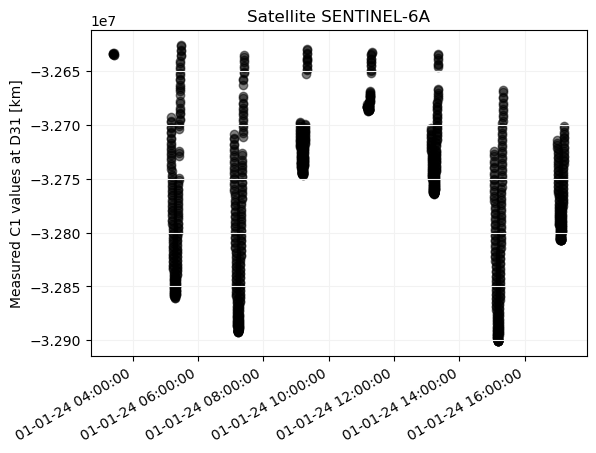

In [8]:
# import modules for plotting ...
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# DORIS beacon
site_name = 'DIOB'

# match the beacon name (i.e 'DIOB') to the internal RINX id (e.g. 'D01')
site_id = rnx.name2id(site_name)

# store data for plotting later on
t = []; c1 = [];

# loop through the RINEX to get observations 
for block in rnx:
    for beacon, data in block:
        # only store observations if the beacon matches
        if beacon == site_id:
            # good, now store the C1 observation value
            t.append(block.t())
            c1.append(data['C1']['value'])

# plot results
plt.scatter([at2pt(ti) for ti in t], c1, color='black', alpha=0.5)
plt.grid(color='0.95')
plt.ylabel("Measured C1 values at {:} [km]".format(site_id))
plt.title("Satellite {:}".format(rnx.sat_name))
# Format the datetime x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%y %H:%M:%S"))
# auto-rotate date labels for readability
plt.gcf().autofmt_xdate()
plt.show()

## DORIS RINEX Data Archive

DORIS RINEX data are publicly available at the [CDDIS](https://cddis.nasa.gov/archive/doris/data/) (now [Earthdata](https://www.earthdata.nasa.gov/)) webpage under the folder `/doris/data/sss/`, where `sss` is the satellite identifier.